In [8]:
# libraries

import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd = os.getcwd()

In [3]:
pwd

'/Users/jasonisberto/Python_Projects/archive'

In [6]:
# Increase width of Jupyter Notebook Interface
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [9]:
vaccine_data = pd.read_csv('country_vaccinations.csv')
vaccine_data

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51303,Zimbabwe,ZWE,2021-10-10,5581524.0,3171399.0,2410125.0,9206.0,22396.0,36.98,21.01,15.97,1484.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
51304,Zimbabwe,ZWE,2021-10-11,5594808.0,3176445.0,2418363.0,13284.0,21918.0,37.07,21.05,16.02,1452.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
51305,Zimbabwe,ZWE,2021-10-12,5612476.0,3183015.0,2429461.0,17668.0,19999.0,37.19,21.09,16.10,1325.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
51306,Zimbabwe,ZWE,2021-10-13,5632534.0,3190977.0,2441557.0,20058.0,19001.0,37.32,21.14,16.18,1259.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


# Data Preprocessing

In [10]:
vaccine_data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,2.790000e+04,2.646000e+04,2.343500e+04,2.292700e+04,5.105600e+04,27900.000000,26460.000000,23435.000000,51056.000000
mean,2.342338e+07,9.854448e+06,6.497176e+06,2.551749e+05,1.300419e+05,48.599821,28.945906,22.201195,3528.110428
std,1.318883e+08,3.900852e+07,2.450492e+07,1.273515e+06,8.473681e+05,47.994505,25.498277,22.922507,4329.794805
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.493890e+05,1.911708e+05,9.627300e+04,5.046000e+03,9.200000e+02,6.190000,4.790000,2.680000,563.000000
50%,1.732574e+06,1.132125e+06,7.691060e+05,2.480100e+04,6.983500e+03,31.725000,22.240000,13.070000,2229.000000
75%,8.851120e+06,5.252562e+06,3.992498e+06,1.136670e+05,4.170425e+04,82.790000,50.820000,38.245000,5231.250000
max,2.227334e+09,1.100842e+09,1.047872e+09,2.474100e+07,2.242429e+07,240.660000,118.610000,117.910000,117497.000000


In [12]:
vaccine_data.shape

(51308, 15)

In [13]:
vaccine_data['country'].value_counts()

Denmark             317
Norway              316
Latvia              314
Scotland            310
England             310
                   ... 
Haiti                87
Pitcairn             85
Falkland Islands     67
Tanzania             57
Niue                 43
Name: country, Length: 222, dtype: int64

In [26]:
#Shows percentage of how many missing values are in each column.

vaccine_data.isnull().sum() / vaccine_data.shape[0]

country                                0.000000
iso_code                               0.000000
date                                   0.000000
total_vaccinations                     0.456225
people_vaccinated                      0.484291
people_fully_vaccinated                0.543249
daily_vaccinations_raw                 0.553150
daily_vaccinations                     0.004912
total_vaccinations_per_hundred         0.456225
people_vaccinated_per_hundred          0.484291
people_fully_vaccinated_per_hundred    0.543249
daily_vaccinations_per_million         0.004912
vaccines                               0.000000
source_name                            0.000000
source_website                         0.000000
dtype: float64

# Data Cleaning
Creating new dataframes with subdata for different topics of interest¶


In [27]:
clean_vaccine_data = vaccine_data.dropna()

clean_vaccine_data.isnull().sum() / clean_vaccine_data.shape[0]

country                                0.0
iso_code                               0.0
date                                   0.0
total_vaccinations                     0.0
people_vaccinated                      0.0
people_fully_vaccinated                0.0
daily_vaccinations_raw                 0.0
daily_vaccinations                     0.0
total_vaccinations_per_hundred         0.0
people_vaccinated_per_hundred          0.0
people_fully_vaccinated_per_hundred    0.0
daily_vaccinations_per_million         0.0
vaccines                               0.0
source_name                            0.0
source_website                         0.0
dtype: float64

In [23]:
#This line puts two columns in dataframe and drops rows with NA values.

sub_data = clean_vaccine_data[['country', 'date', 'total_vaccinations']]
sub_data.head()

,country,date,total_vaccinations
94,Afghanistan,2021-05-27,593313.0
101,Afghanistan,2021-06-03,630305.0
260,Albania,2021-02-18,3049.0
342,Albania,2021-05-11,622507.0
343,Albania,2021-05-12,632676.0


In [29]:
#Double checks to see if sub dataframe was done correctly
sub_data.isnull().sum() / sub_data.shape[0]

country               0.0
date                  0.0
total_vaccinations    0.0
dtype: float64

In [32]:
#Double checks the shape of the subset dataframe 
sub_data.shape

(19524, 3)

In [35]:
#Subsets United States data from the original data set.

US_Data = sub_data.loc[sub_data['country'] == 'United States']
US_Data

,country,date,total_vaccinations
48950,United States,2021-01-14,11148991.0
48951,United States,2021-01-15,12279180.0
48956,United States,2021-01-20,16525281.0
48957,United States,2021-01-21,17546374.0
48958,United States,2021-01-22,19107959.0
...,...,...,...
49216,United States,2021-10-07,399552444.0
49217,United States,2021-10-08,400669422.0
49218,United States,2021-10-09,401819240.0
49222,United States,2021-10-13,404371247.0


In [37]:
#changes the total_vaccinations column from string elements to integer elements.

pd.to_numeric(US_Data['total_vaccinations'])

48950     11148991.0
48951     12279180.0
48956     16525281.0
48957     17546374.0
48958     19107959.0
            ...     
49216    399552444.0
49217    400669422.0
49218    401819240.0
49222    404371247.0
49223    405444558.0
Name: total_vaccinations, Length: 256, dtype: float64

# Creating Visuals to represent data¶


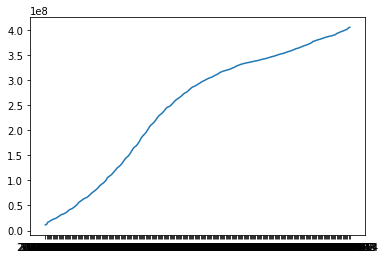

In [46]:
#Plots the graph of US Total Vaccinations. 
#MATPLOTLIB GRAPH

x = US_Data['date']
y = US_Data['total_vaccinations']

plt.plot(x, y)
ax = plt.gca()

plt.show()

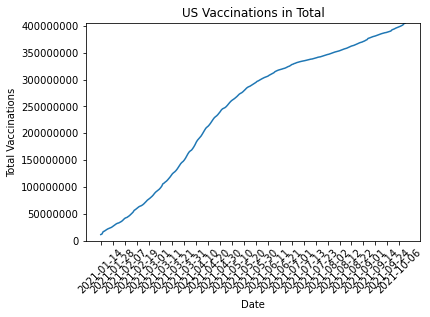

In [52]:
plt.plot(x, y)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 10), rotation = 45)
plt.ylim(0, max(y))
plt.title('US Vaccinations in Total')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')

plt.show()

Text(0, 0.5, 'Total Vaccinations')

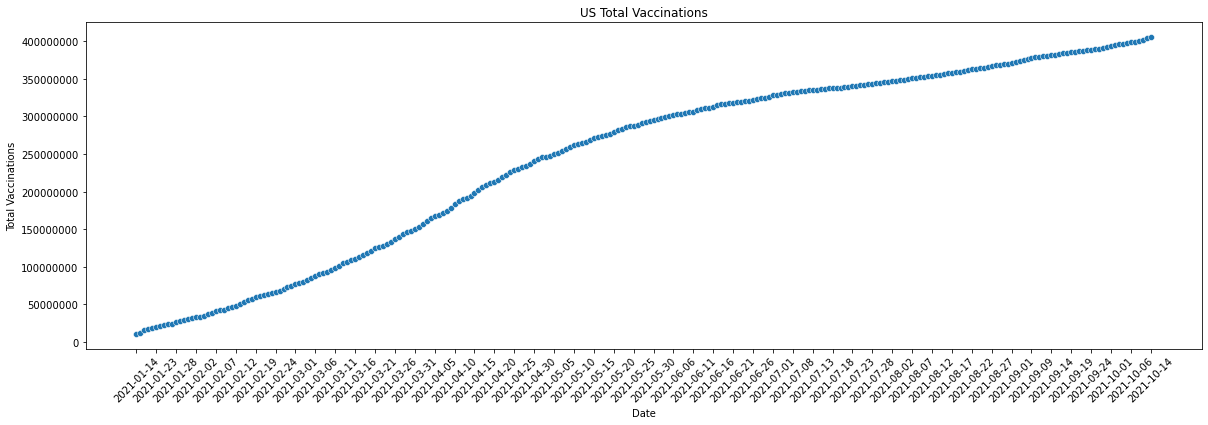

In [63]:
#SEABORN GRAPH

plt.figure(figsize = (20, 6))
plt.title('US Total Vaccinations')
sns.scatterplot(x = US_Data['date'], y = US_Data['total_vaccinations'])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 5), rotation = 45)
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')

In [64]:
list(vaccine_data.columns)

['country',
 'iso_code',
 'date',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'daily_vaccinations_raw',
 'daily_vaccinations',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'daily_vaccinations_per_million',
 'vaccines',
 'source_name',
 'source_website']

In [ ]:
#Plotting scatterplot matrix using Seaborn 
#create dataframe with important features.